# **Como usar NLTK en Google Colab**

In [1]:
import nltk
nltk.download('cess_esp')

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Unzipping corpora/cess_esp.zip.


True

# **Expresiones Regulares**


*   Constituyen un lenguaje estandarizado para definir cadenas de búsqueda de texto.
*   Libreria de operaciones con  expresiones regulares de Python [re](https://docs.python.org/3/library/re.html)
*   Reglas para escribir expresiones regulares [Wiki](https://es.wikipedia.org/wiki/Expresión_regular)



In [2]:
# spanish Corpus: https://mailman.uib.no/public/corpora/2007-October/005448.html
import re
corpus = nltk.corpus.cess_esp.sents()
print(corpus)
print(len(corpus))

[['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.'], ['Una', 'portavoz', 'de', 'EDF', 'explicó', 'a', 'EFE', 'que', 'el', 'proyecto', 'para', 'la', 'construcción', 'de', 'Altamira_2', ',', 'al', 'norte', 'de', 'Tampico', ',', 'prevé', 'la', 'utilización', 'de', 'gas', 'natural', 'como', 'combustible', 'principal', 'en', 'una', 'central', 'de', 'ciclo', 'combinado', 'que', 'debe', 'empezar', 'a', 'funcionar', 'en', 'mayo_del_2002', '.'], ...]
6030


In [3]:
flatten = [w for l in corpus for w in l]
print(flatten[:20])
print(len(flatten))

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana']
192686


### **Estructura de la funcion re.search()**
```
# Determina si el patron de búsqueda p esta contenido en la cadena s
re.seach(p, s)
```



In [ ]:
# Meta-caracteres básicos
arr = [w for w in flatten if re.search('es', w)]
arr[:5]

['estatal', 'jueves', 'empresa', 'centrales', 'francesa']

In [ ]:
arr = [w for w in flatten if re.search('es$', w)]
arr[:5]

['jueves', 'centrales', 'millones', 'millones', 'dólares']

In [ ]:
arr = [w for w in flatten if re.search('^..j..t..$', w)]
arr

['tajantes']

In [ ]:
#Rangos [a-z], [A-Z], [0-9]
arr = [w for w in flatten if re.search('^[ghi][mno][jlk][def]$', w)]
arr

['golf', 'golf']

In [ ]:
#Clausuras *, * (Kleene closures)
arr = [w for w in flatten if re.search('^(no)*', w)]
arr[:10]

['El',
 'grupo',
 'estatal',
 'Electricité_de_France',
 '-Fpa-',
 'EDF',
 '-Fpt-',
 'anunció',
 'hoy',
 ',']

In [ ]:
arr = [w for w in flatten if re.search('(no)+', w)]
arr[:10]

['norte',
 'no',
 'no',
 'noche',
 'no',
 'no',
 'gobierno',
 'notificación',
 'Unión_Fenosa_Inversiones',
 'italiano']

# **Normalización de Texto** (como aplicación de las expresiones regulares)


## **Tokenización:** Es el proceso mediante el cual se sub-divide una cadena de texto en unidades linguísticas minimas (palabras)


In [4]:
texto = """ Cuando sea el rey del mundo  (imaginaba él en su cabeza) no tendré que  preocuparme por estas bobadas.
            Era solo un niño de 7 años, pero pensaba que podría ser cualquier cosa que su imaginación le permitiera visualizar en su cabeza ..."""
print(texto)

 Cuando sea el rey del mundo  (imaginaba él en su cabeza) no tendré que  preocuparme por estas bobadas.
            Era solo un niño de 7 años, pero pensaba que podría ser cualquier cosa que su imaginación le permitiera visualizar en su cabeza ...


In [ ]:
|# Caso 1: tokenizacion más simple: por espacios vacios !
print(re.split(r' ', texto))

['', 'Cuando', 'sea', 'el', 'rey', 'del', 'mundo', '', '(imaginaba', 'él', 'en', 'su', 'cabeza)', 'no', 'tendré', 'que', '', 'preocuparme', 'por', 'estas', 'bobadas.\n', '', '', '', '', '', '', '', '', '', '', '', 'Era', 'solo', 'un', 'niño', 'de', '7', 'años,', 'pero', 'pensaba', 'que', 'podría', 'ser', 'cualquier', 'cosa', 'que', 'su', 'imaginación', 'le', 'permitiera', 'visualizar', 'en', 'su', 'cabeza', '...']


In [ ]:
# Caso 2: tokenización usando expresiones regulares
print(re.split(r'[ \t\n]+', texto))

['', 'Cuando', 'sea', 'el', 'rey', 'del', 'mundo', '(imaginaba', 'él', 'en', 'su', 'cabeza)', 'no', 'tendré', 'que', 'preocuparme', 'por', 'estas', 'bobadas.', 'Era', 'solo', 'un', 'niño', 'de', '7', 'años,', 'pero', 'pensaba', 'que', 'podría', 'ser', 'cualquier', 'cosa', 'que', 'su', 'imaginación', 'le', 'permitiera', 'visualizar', 'en', 'su', 'cabeza', '...']


In [ ]:
# RegEx reference: \W -> all characters other than letters, digits or underscore
print(re.split(r'[ \W\t\n]+', texto))

['', 'Cuando', 'sea', 'el', 'rey', 'del', 'mundo', 'imaginaba', 'él', 'en', 'su', 'cabeza', 'no', 'tendré', 'que', 'preocuparme', 'por', 'estas', 'bobadas', 'Era', 'solo', 'un', 'niño', 'de', '7', 'años', 'pero', 'pensaba', 'que', 'podría', 'ser', 'cualquier', 'cosa', 'que', 'su', 'imaginación', 'le', 'permitiera', 'visualizar', 'en', 'su', 'cabeza', '']


## **Tokenizador de NLTK**

NLTK dispone de distintos tokenizers:

1.   **TreebankWordTokenizer:** tokenizer por defecto.
2.   **PunktTokenizer:** tokeniza en los signos de puntuación, pero los mantiene junto a la palabra.
3.   **WordPunctTokenizer:** separa en los signos de puntuación, pero los incluye en tokens separados.
4.   **RegexpTokenizer:** tokenizer que permite trabajar con regex.

In [ ]:
# nuestra antigua regex no funciona en este caso:
texto = 'En los E.U. esa postal vale $15.50 ...'
print(re.split(r'[ \W\t\n]+', texto))

['En', 'los', 'E', 'U', 'esa', 'postal', 'vale', '15', '50', '']


In [ ]:
pattern = r'''(?x)                 # set flag to allow verbose regexps
              (?:[A-Z]\.)+         # abbreviations, e.g. U.S.A.
              | \w+(?:-\w+)*       # words with optional internal hyphens
              | \$?\d+(?:\.\d+)?%? # currency and percentages, e.g. $12.40, 82%
              | \.\.\.             # ellipsis
              | [][.,;"'?():-_`]   # these are separate tokens; includes ], [
'''
nltk.regexp_tokenize(texto, pattern)

['En', 'los', 'E.U.', 'esa', 'postal', 'vale', '$15.50', '...']

In [ ]:
import nltk.data
nltk.download('punkt')
tokenizer = nltk.data.load('tokenizers/punkt/spanish.pickle')
print(tokenizer.tokenize(texto))

['En los E.U.', 'esa postal vale $15.50 ...']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from nltk import word_tokenize, TreebankWordTokenizer
word_tokenize(texto)

['En', 'los', 'E.U', '.', 'esa', 'postal', 'vale', '$', '15.50', '...']

In [ ]:
tokenizer = TreebankWordTokenizer()
tokenizer.tokenize (texto)

['En', 'los', 'E.U.', 'esa', 'postal', 'vale', '$', '15.50', '...']

## **Lematización:** Proceso para encontrar la raíz linguística de una palabra

*   Derivación (stemming) : lematización simple
Corpus para crear propias lematizaciones [corpus](https://universaldependencies.org/#download)

y se puede seguir el siguiente tutorial [Tutorial](https://medium.com/analytics-vidhya/how-to-build-a-lemmatizer-7aeff7a1208c)


In [5]:
# Derivación simple
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
SnowballStemmer.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

In [8]:
stem = SnowballStemmer('spanish')
stem.stem('trabajo')

'trabaj'

In [ ]:
# Lematización
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [ ]:
nltk.download('wordnet')
lemm.lemmatize('trabajando')

[nltk_data] Downloading package wordnet to /root/nltk_data...


'trabajando'

### Ingles

In [ ]:
import nltk
from nltk.stem import PorterStemmer
# Initialize Python porter stemmer
ps = PorterStemmer()
# Example inflections to reduce
example_words = ["program","programming","programer","programs","programmed"]
# Perform stemming
print("{0:20}{1:20}".format("--Word--","--Stem--"))
for word in example_words:
   print ("{0:20}{1:20}".format(word, ps.stem(word)))

--Word--            --Stem--            
program             program             
programming         program             
programer           program             
programs            program             
programmed          program             


In [ ]:
import string
from nltk.tokenize import word_tokenize

example_sentence = "Python programmers often tend like programming in python because it's like english. We call people who program in python pythonistas."

# Remove punctuation
example_sentence_no_punct = example_sentence.translate(str.maketrans("", "", string.punctuation))

# Create tokens
word_tokens = word_tokenize(example_sentence_no_punct)

# Perform stemming
print("{0:20}{1:20}".format("--Word--","--Stem--"))
for word in word_tokens:
    print ("{0:20}{1:20}".format(word, ps.stem(word)))

--Word--            --Stem--            
Python              python              
programmers         programm            
often               often               
tend                tend                
like                like                
programming         program             
in                  in                  
python              python              
because             becaus              
its                 it                  
like                like                
english             english             
We                  we                  
call                call                
people              peopl               
who                 who                 
program             program             
in                  in                  
python              python              
pythonistas         pythonista          


In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")
# Initialize wordnet lemmatizer
wnl = WordNetLemmatizer()
# Example inflections to reduce
example_words = ["program","programming","programer","programs","programmed"]
# Perform lemmatization
print("{0:20}{1:20}".format("--Word--","--Lemma--"))
for word in example_words:
   print ("{0:20}{1:20}".format(word, wnl.lemmatize(word, pos="v")))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


--Word--            --Lemma--           
program             program             
programming         program             
programer           programer           
programs            program             
programmed          program             


In [ ]:
example_sentence = "Python programmers often tend like programming in python because it's like english. We call people who program in python pythonistas."
# Remove punctuation
example_sentence_no_punct = example_sentence.translate(str.maketrans("", "", string.punctuation))
word_tokens = word_tokenize(example_sentence_no_punct)
# Perform lemmatization
print("{0:20}{1:20}".format("--Word--","--Lemma--"))
for word in word_tokens:
   print ("{0:20}{1:20}".format(word, wnl.lemmatize(word, pos="v")))

--Word--            --Lemma--           
Python              Python              
programmers         programmers         
often               often               
tend                tend                
like                like                
programming         program             
in                  in                  
python              python              
because             because             
its                 its                 
like                like                
english             english             
We                  We                  
call                call                
people              people              
who                 who                 
program             program             
in                  in                  
python              python              
pythonistas         pythonistas         


###Algunos Mejores en Español

In [ ]:
!python -m spacy download es_core_news_md # modelo de tamaño mediano
!python -m spacy link es_core_news_md es
import spacy
nlp = spacy.load('es_core_news_md')

2023-07-23 01:44:15.528648: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-23 01:44:18.899970: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 9.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
2023-07-23 01:44:57.367272: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-23 01:44:58.858175: W tensorflow/compiler/tf2tensorrt/utils/py

In [ ]:
doc = nlp("voy a ir trabajando en el proyecto")
for token in doc:
    print(token.text, token.lemma_)

voy ir
a a
ir ir
trabajando trabajar
en en
el el
proyecto proyecto


# **Estadistica de Corpus**:

* En este notebook vamos a descargar el dataset `book` que contiene muchos libros en ingles en formato de texto tokenizado, de los cuales vamos a hacer procesamiento.

In [ ]:
import nltk
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Analizando un texto

In [ ]:
# escogemos text1 que es el famoso libro Moby Dick
text1

<Text: Moby Dick by Herman Melville 1851>

In [ ]:
# Vemos que el texto ya viene tokenizado incluyendo caracteres especiales ....
text1.tokens[:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [ ]:
# ¿Cuantos tokens tiene el libro?
len(text1)

260819

### Medida de riqueza lexica en un texto:
$$ R_l = \frac{\text{total de palabras únicas}}{\text{total de palabras}} = \frac{\text{longitud del vocabulario}}{\text{longitud del texto}}$$

In [ ]:
# Primero realizamos la construcción de un vocabulario (identificamos las palabras unicas que hay en el libro)
# https://docs.python.org/2/library/sets.html
vocabulario = sorted(set(text1))
vocabulario[1000:1050]

['Crew',
 'Crish',
 'Crockett',
 'Cross',
 'Crossed',
 'Crossing',
 'Crotch',
 'Crowding',
 'Crown',
 'Crozetts',
 'Cruelty',
 'Cruising',
 'Cruppered',
 'Crusaders',
 'Crushed',
 'Crying',
 'Cuba',
 'Curious',
 'Curse',
 'Cursed',
 'Curses',
 'Cussed',
 'Customs',
 'Cut',
 'Cutter',
 'Cutting',
 'Cuvier',
 'Cyclades',
 'Czar',
 'D',
 'DAGGOO',
 'DAM',
 'DANCE',
 'DANCING',
 'DANIEL',
 'DANISH',
 'DARKENS',
 'DARWIN',
 'DAVENANT',
 'DEAD',
 'DEATH',
 'DEBELL',
 'DECK',
 'DEL',
 'DESTROYED',
 'DEVIL',
 'DICTIONARY',
 'DID',
 'DIGNITY',
 'DISCOVERS']

In [ ]:
# luego definimos la medida de riqueza léxica:
rl = len(set(text1))/len(text1)
print(rl)

0.07406285585022564


In [ ]:
# podemos definir funciones en python para estas medidas léxicas:
def riqueza_lexica(texto):
  return len(set(texto))/len(texto)

def porcentaje_palabra(palabra, texto):
  return 100*texto.count(palabra)/len(texto)

riqueza_lexica(text1)

0.07406285585022564

In [ ]:
# podemos calcular el porcentaje de texto que ocupa una palabra en una cadena larga de texto.
porcentaje_palabra('monster', text1)

0.018786974875296663

In [ ]:
# y calcular en conteo el numero de veces que aparece:
text1.count('monster')

49

## Estadistica del Lenguaje

Los cálculos estadísticos más simples que se pueden efectuar sobre un texto o un corpus son los relacionados con frecuencia de aparición de palabras.

* Podemos construir un diccionario en Python donde las llaves sean las palabras y los valores sean las frecuencias de ocurrencias de esas palabras.

* ejemplo `dic = {'monster': 49 ,  'boat': 54,  ...}`


In [ ]:
# METODO NO recomendable para conjuntos muy grandes
dic = {}
for palabra in set(text1):
  #dic[palabra] = porcentaje_palabra(palabra, text1)
  dic[palabra] = text1.count(palabra)
dic

{'try': 49,
 'sharpest': 1,
 'urchins': 1,
 'crags': 1,
 'peremptory': 2,
 'inward': 4,
 'stander': 1,
 'EX': 3,
 'chock': 1,
 'bedsteads': 1,
 'perilous': 15,
 'SHIP': 5,
 'Leaning': 1,
 'browed': 2,
 'doubted': 5,
 'Queequeg': 252,
 'crab': 1,
 'enslaved': 1,
 'democrat': 1,
 'nieces': 1,
 'ATTACK': 1,
 'depreciates': 1,
 'ergo': 2,
 'connect': 1,
 'advantages': 1,
 'rob': 1,
 'corners': 4,
 'spluttering': 1,
 'steps': 5,
 'flowery': 3,
 'suspected': 5,
 'clapping': 4,
 'remains': 24,
 'declare': 6,
 'princess': 1,
 '1776': 1,
 'jammed': 3,
 'creamy': 5,
 'twine': 6,
 'compounded': 1,
 'gaping': 3,
 'eyeing': 27,
 'fertility': 1,
 'emulation': 1,
 'stride': 1,
 'dust': 10,
 'snored': 1,
 'Povelson': 2,
 'motioning': 1,
 'summers': 2,
 'bigger': 2,
 'discovering': 1,
 'scrutinizing': 1,
 'seize': 8,
 'alternately': 3,
 'encouraged': 1,
 'gaining': 9,
 'corridors': 1,
 'razor': 2,
 'flashed': 3,
 'husband': 3,
 'repenting': 2,
 'unneeded': 1,
 'organs': 4,
 '--': 1070,
 'CHEEVER': 1,
 

### Método FreqDist de NLTK

In [ ]:
# NLTK tiene un metodo muy eficiente
fdist = FreqDist(text1)

In [ ]:
fdist.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

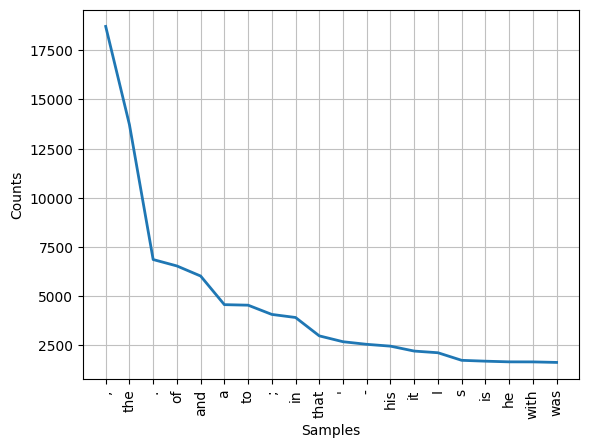

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist.plot(20)

In [ ]:
fdist['monster']

49

### Distribuciones sobre contenido con filtro-fino

* Como vimos en la sección anterior, los tokens más frecuentes en un texto no son necesariamente las palabras que mas informacion nos arrojan sobre el contenido del mismo.
* Por ello, es mejor filtrar y construir distribuciones de frecuencia que no consideren signos de puntuación o caracteres especiales

In [ ]:
# Tal vez sea más interesante estudiar palabras que tengan una longitud minima especifica
long_words = [palabra for palabra in text1 if len(palabra)>5]
vocabulario_filtrado = sorted(set(long_words))
vocabulario_filtrado[:10]

['ACCOUNT',
 'ADDITIONAL',
 'ADVANCING',
 'ADVENTURES',
 'AFFGHANISTAN',
 'AFRICA',
 'AGAINST',
 'ALFRED',
 'ALGERINE',
 'AMERICA']

Podemos ahora construir una lista de tuplas, basados en los conteos ya pre-calculados de la función `FreqDist`, así:

`fdist_filtrado = [('account', 2), ('additional', 32), ('advancing', 5), ...]`

Luego podemos convertir el objeto creado a formato de `np.array`de **Numpy** para poder hacer un sort por palabras mas frecuentes.

`fdist_filtrado = np.array(fdist_filtrado, *args)`

`np.sort(fdist_filtrado, *args) = [('account', 2), ('advancing', 5), ('additional', 32), ...]`

In [ ]:
palabras_interesantes = [(palabra, fdist[palabra]) for palabra in set(text1) if len(palabra)>5 and fdist[palabra]>10]
dtypes = [('word', 'S10'), ('frequency', int)]
palabras_interesantes = np.array(palabras_interesantes, dtype=dtypes)
palabras_ordenadas = np.sort(palabras_interesantes, order = 'frequency')
palabras_ordenadas[-20:] # top de palabras mas frecuentes

array([(b'between', 117), (b'something', 119), (b'against', 132),
       (b'things', 132), (b'thought', 149), (b'CHAPTER', 150),
       (b'without', 154), (b'Pequod', 172), (b'should', 181),
       (b'almost', 186), (b'Starbuck', 196), (b'himself', 203),
       (b'Captain', 215), (b'through', 227), (b'whales', 237),
       (b'little', 247), (b'Queequeg', 252), (b'seemed', 283),
       (b'before', 293), (b'though', 335)],
      dtype=[('word', 'S10'), ('frequency', '<i8')])

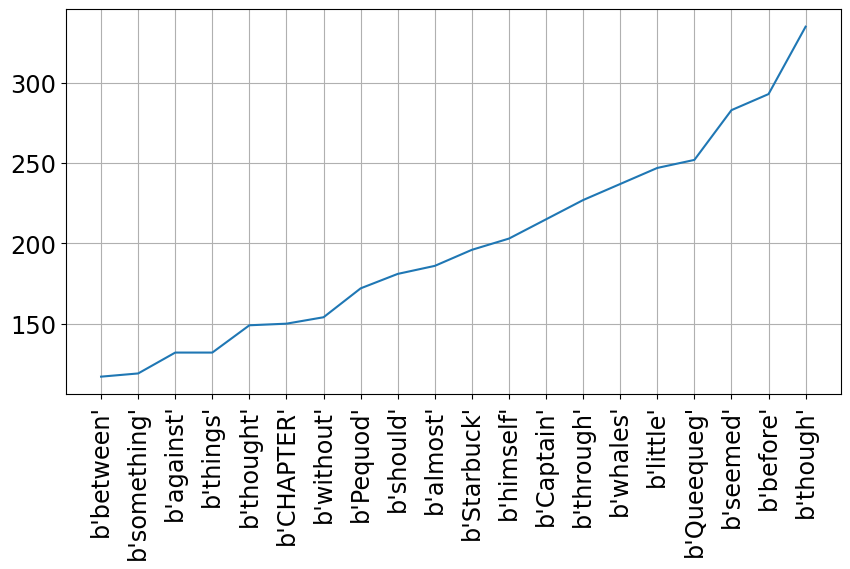

In [ ]:
# Construccion de un grafico de barras customizado con Matplotlib
# https://matplotlib.org/3.1.1/gallery/ticks_and_spines/custom_ticker1.html#sphx-glr-gallery-ticks-and-spines-custom-ticker1-py
top_words = 20
x = np.arange(len(palabras_ordenadas[-top_words:]))
y = [freq[1] for freq in palabras_ordenadas[-top_words:]]
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xticks(x, [str(freq[0]) for freq in palabras_ordenadas[-top_words:]], rotation = 'vertical')
plt.tick_params(labelsize = 'xx-large')
plt.grid(True)
plt.show()

### Stop words

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = set(stopwords.words('english'))
no_stop_words = [(palabra, fdist[palabra]) for palabra in set(text1) if not palabra.lower() in stop_words]
dtypes = [('word', 'S10'), ('frequency', int)]
palabras_interesantes = np.array(no_stop_words, dtype=dtypes)
palabras_ordenadas = np.sort(palabras_interesantes, order = 'frequency')
palabras_ordenadas[-20:] # top de palabras mas frecuentes

array([(b'sea',   433), (b'old',   436), (b'ye',   460), (b'."',   489),
       (b'Ahab',   501), (b'ship',   507), (b'man',   508),
       (b'upon',   538), (b'like',   624), (b'?',   637), (b'one',   889),
       (b'whale',   906), (b'--',  1070), (b'!',  1269), (b'"',  1478),
       (b'-',  2552), (b"'",  2684), (b';',  4072), (b'.',  6862),
       (b',', 18713)], dtype=[('word', 'S10'), ('frequency', '<i8')])

In [ ]:
stop_words = set(stopwords.words('english'))
no_stop_words = [(palabra, fdist[palabra]) for palabra in set(text1) if not palabra.lower() in stop_words and not re.search("[^a-zA-Z0-9s]", palabra)]
dtypes = [('word', 'S10'), ('frequency', int)]
palabras_interesantes = np.array(no_stop_words, dtype=dtypes)
palabras_ordenadas = np.sort(palabras_interesantes, order = 'frequency')
palabras_ordenadas[-20:] # top de palabras mas frecuentes

array([(b'great', 293), (b'still', 299), (b'yet', 300), (b'said', 302),
       (b'long', 318), (b'time', 324), (b'boat', 330), (b'head', 335),
       (b'though', 335), (b'would', 421), (b'sea', 433), (b'old', 436),
       (b'ye', 460), (b'Ahab', 501), (b'ship', 507), (b'man', 508),
       (b'upon', 538), (b'like', 624), (b'one', 889), (b'whale', 906)],
      dtype=[('word', 'S10'), ('frequency', '<i8')])

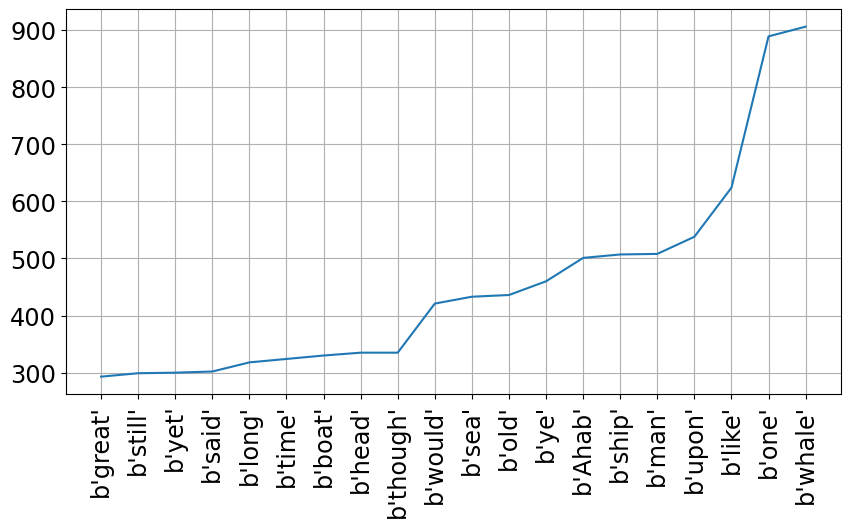

In [ ]:
top_words = 20
x = np.arange(len(palabras_ordenadas[-top_words:]))
y = [freq[1] for freq in palabras_ordenadas[-top_words:]]
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xticks(x, [str(freq[0]) for freq in palabras_ordenadas[-top_words:]], rotation = 'vertical')
plt.tick_params(labelsize = 'xx-large')
plt.grid(True)
plt.show()

##Bi-gramas
* Parejas de palabras que ocurren consecutivas.
Son utiles para la Polisemia y homonimia

In [ ]:
md_bigrams = list(bigrams(text1))
fdist = FreqDist(md_bigrams)
md_bigrams[:10]

[('[', 'Moby'),
 ('Moby', 'Dick'),
 ('Dick', 'by'),
 ('by', 'Herman'),
 ('Herman', 'Melville'),
 ('Melville', '1851'),
 ('1851', ']'),
 (']', 'ETYMOLOGY'),
 ('ETYMOLOGY', '.'),
 ('.', '(')]

Aqui podemos obtener los bi-gramas más frecuentes en este texto:

In [ ]:
fdist.most_common(10)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

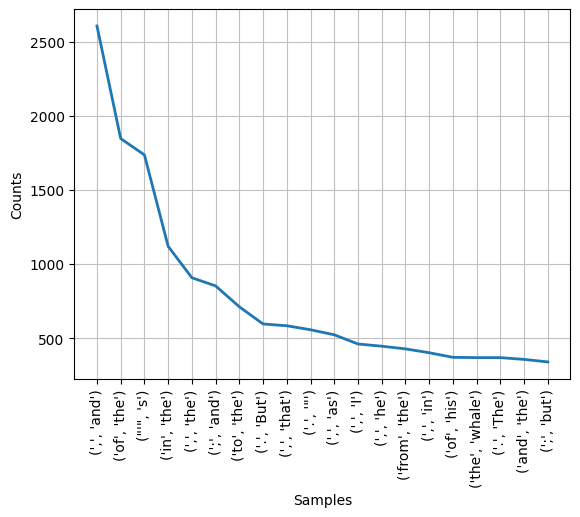

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist.plot(20)

### Filtrado de bi-gramas
* Sin embargo, observamos que los bi-gramas más comunes no representan realmente frases o estructuras léxicas de interes.
* Tal vez, aplicar algun tipo de filtro nos permita ver estructuras más relevantes.

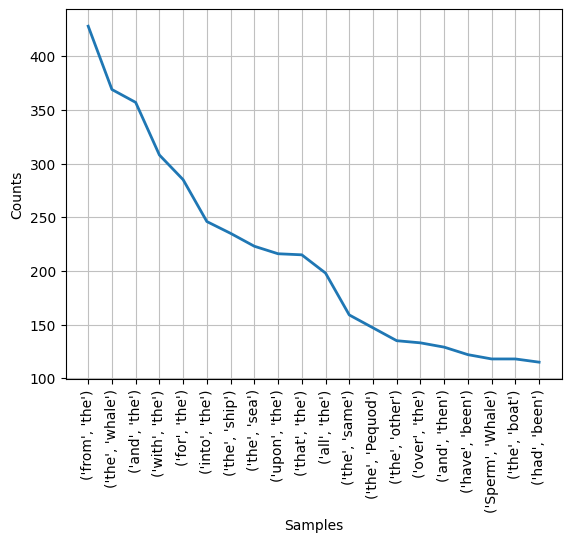

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
threshold = 2
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold]
filtered_dist = FreqDist(filtered_bigrams)
filtered_dist.plot(20)

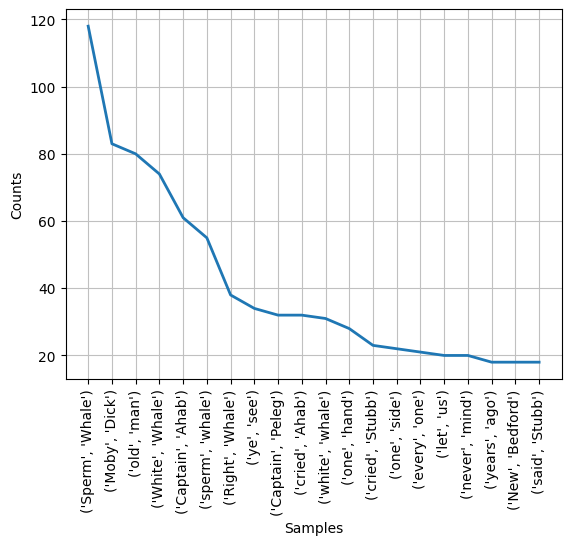

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
filtered_bigrams = [bigram for bigram in md_bigrams if not bigram[0].lower() in stop_words and not re.search("[^a-zA-Z0-9s]", bigram[0]) and not bigram[1].lower() in stop_words and not re.search("[^a-zA-Z0-9s]", bigram[1])]
filtered_dist = FreqDist(filtered_bigrams)
filtered_dist.plot(20)

## Tri-gramas

In [ ]:
from nltk.util import ngrams
md_trigrams = list(ngrams(text1,3))
fdist = FreqDist(md_trigrams)
md_trigrams[:10]

[('[', 'Moby', 'Dick'),
 ('Moby', 'Dick', 'by'),
 ('Dick', 'by', 'Herman'),
 ('by', 'Herman', 'Melville'),
 ('Herman', 'Melville', '1851'),
 ('Melville', '1851', ']'),
 ('1851', ']', 'ETYMOLOGY'),
 (']', 'ETYMOLOGY', '.'),
 ('ETYMOLOGY', '.', '('),
 ('.', '(', 'Supplied')]

In [ ]:
fdist.most_common(10)

[((',', 'and', 'the'), 187),
 (('don', "'", 't'), 103),
 (('of', 'the', 'whale'), 101),
 ((',', 'in', 'the'), 93),
 ((',', 'then', ','), 87),
 (('whale', "'", 's'), 81),
 (('.', 'It', 'was'), 81),
 (('ship', "'", 's'), 80),
 (('the', 'Sperm', 'Whale'), 77),
 ((',', 'as', 'if'), 76)]

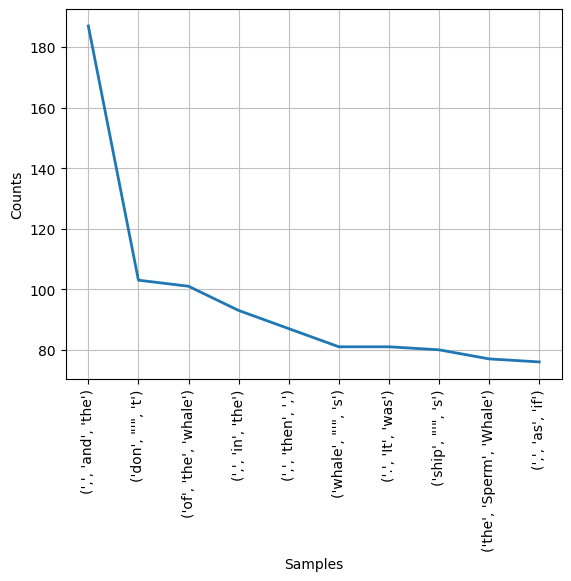

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist.plot(10)

In [ ]:
filtered_trigrams= []
for trigrams in md_trigrams:
  res = True
  for word in trigrams:
    if word.lower() in stop_words or re.search("[^a-zA-Z0-9s]", word):
      res = False
      break
  if res:
    filtered_trigrams.append(trigrams)

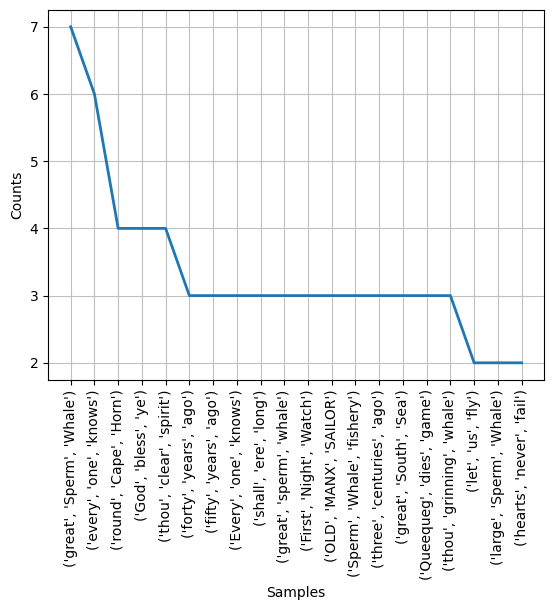

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
filtered_dist = FreqDist(filtered_trigrams)
filtered_dist.plot(20)

## Collocations (Colocaciones)

* Son secuencias de palabras que suelen ocurrir en textos o conversaciones con una **frecuencia inusualmente alta** [NLTK doc](http://www.nltk.org/book/ch01.html)
* Las colocaciones de una palabra son declaraciones formales de donde suele ubicarse tipicamente esa palabra [Manning & Schütze, 1990, Foundations of Statistical Natural Language Processing, Capítulo 6](https://nlp.stanford.edu/fsnlp/)

* Ejemplos de colocacciones en español [100 colocaciones](https://www.ejemplos.co/100-ejemplos-de-colocaciones/)

In [ ]:
import pandas as pd
md_bigrams = list(bigrams(text1))

threshold = 2
#distribution of bi-grams
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold]
filtered_bigram_dist = FreqDist(filtered_bigrams)
#distribution of words
filtered_words = [word for word in text1 if len(word)>threshold]
filtered_word_dist = FreqDist(filtered_words)

df = pd.DataFrame()
df['bi_gram'] = list(set(filtered_bigrams))
df['word_0'] = df['bi_gram'].apply(lambda x: x[0])
df['word_1'] = df['bi_gram'].apply(lambda x: x[1])
df['bi_gram_freq'] = df['bi_gram'].apply(lambda x: filtered_bigram_dist[x])
df['word_0_freq'] = df['word_0'].apply(lambda x: filtered_word_dist[x])
df['word_1_freq'] = df['word_1'].apply(lambda x: filtered_word_dist[x])
df

,bi_gram,word_0,word_1,bi_gram_freq,word_0_freq,word_1_freq
0,"(that, Ahab)",that,Ahab,5,2982,501
1,"(its, bows)",its,bows,3,372,49
2,"(Does, not)",Does,not,2,6,1103
3,"(unbounded, prairie)",unbounded,prairie,1,2,11
4,"(would, involve)",would,involve,2,421,6
...,...,...,...,...,...,...
67937,"(ghostly, aboriginalness)",ghostly,aboriginalness,1,3,1
67938,"(sword, seems)",sword,seems,1,23,84
67939,"(slunk, away)",slunk,away,1,1,175
67940,"(tow, the)",tow,the,2,16,13721


### Pointwise Mutual Information (PMI)
Una métrica basada en _teoria de la información_ para encontrar **Collocations**.

$$
PMI = \log\left(\frac{P(w_1, w_2)}{P(w_1)P(w_2)}\right)
$$

In [ ]:
df['PMI'] = df[['bi_gram_freq', 'word_0_freq', 'word_1_freq']].apply(lambda x:np.log2(x.values[0]/(x.values[1]*x.values[2])), axis = 1)
df['log(bi_gram_freq)'] = df['bi_gram_freq'].apply(lambda x: np.log2(x))
df

,bi_gram,word_0,word_1,bi_gram_freq,word_0_freq,word_1_freq,PMI,log(bi_gram_freq)
0,"(that, Ahab)",that,Ahab,5,2982,501,-18.188803,2.321928
1,"(its, bows)",its,bows,3,372,49,-12.568906,1.584963
2,"(Does, not)",Does,not,2,6,1103,-11.692180,1.000000
3,"(unbounded, prairie)",unbounded,prairie,1,2,11,-4.459432,0.000000
4,"(would, involve)",would,involve,2,421,6,-10.302639,1.000000
...,...,...,...,...,...,...,...,...
67937,"(ghostly, aboriginalness)",ghostly,aboriginalness,1,3,1,-1.584963,0.000000
67938,"(sword, seems)",sword,seems,1,23,84,-10.915879,0.000000
67939,"(slunk, away)",slunk,away,1,1,175,-7.451211,0.000000
67940,"(tow, the)",tow,the,2,16,13721,-16.744098,1.000000


In [ ]:
df.sort_values(by = 'PMI', ascending=False)

,bi_gram,word_0,word_1,bi_gram_freq,word_0_freq,word_1_freq,PMI,log(bi_gram_freq)
49981,"(morally, enfeebled)",morally,enfeebled,1,1,1,0.000000,0.0
45520,"(officio, professors)",officio,professors,1,1,1,0.000000,0.0
35553,"(sportively, festooning)",sportively,festooning,1,1,1,0.000000,0.0
67029,"(ironical, coincidings)",ironical,coincidings,1,1,1,0.000000,0.0
28922,"(IMPOSING, WAY)",IMPOSING,WAY,1,1,1,0.000000,0.0
...,...,...,...,...,...,...,...,...
41291,"(man, the)",man,the,1,508,13721,-22.732783,0.0
36290,"(some, the)",some,the,1,578,13721,-22.919024,0.0
161,"(one, the)",one,the,1,889,13721,-23.540138,0.0
62221,"(the, not)",the,not,1,13721,1103,-23.851315,0.0


In [ ]:
import plotly.express as px
fig = px.scatter(x = df['PMI'].values, y = df['log(bi_gram_freq)'].values, color = df['PMI']+df['log(bi_gram_freq)'],
                 size = (df['PMI']+df['log(bi_gram_freq)']).apply(lambda x: 1/(1+abs(x))).values,
                 hover_name = df['bi_gram'].values, width = 600, height = 600, labels = {'x': 'PMI', 'y': 'Log(Bigram Frequency)'})
fig.show()

Output hidden; open in https://colab.research.google.com to view.

### Medidas pre-construidas en NLTK

In [ ]:
# ver documentación https://www.nltk.org/_modules/nltk/metrics/association.html
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(text1)

In [ ]:
finder.apply_freq_filter(20)
finder.nbest(bigram_measures.pmi, 10)

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('never', 'mind'),
 ('!"', 'cried'),
 ('no', 'means'),
 ('each', 'other')]

### Textos en Español

In [ ]:
# descargamos corpus en español  https://mailman.uib.no/public/corpora/2007-October/005448.html
nltk.download('cess_esp')
corpus = nltk.corpus.cess_esp.sents()
flatten_corpus = [w for l in corpus for w in l]

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


In [ ]:
print(corpus[0])

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.']


In [ ]:
print(flatten_corpus[:50])

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.', 'Una', 'portavoz', 'de', 'EDF', 'explicó', 'a', 'EFE', 'que', 'el', 'proyecto']


In [ ]:
finder = BigramCollocationFinder.from_documents(corpus)
finder.apply_freq_filter(10)
finder.nbest(bigram_measures.pmi, 10)

[('señora', 'Aguirre'),
 ('secretario', 'general'),
 ('elecciones', 'generales'),
 ('campaña', 'electoral'),
 ('quiere', 'decir'),
 ('Se', 'trata'),
 ('segunda', 'vuelta'),
 ('director', 'general'),
 ('primer', 'ministro'),
 ('primer', 'lugar')]

## Recursos léxicos (lexicons)

*   Son colecciones de palabras o frases que tienen asociadas etiquetas o meta-informacion de algún tipo (POS tags, significados gramaticales, etc ...)

**comentario:** POS (Part of Speech), también llamado etiquetado gramatical o etiquetado de palabras por categorias, consiste en etiquetar la categoria gramatical a la que pertence cada palabra en un volumen de texto, siendo las categorias:

1.   Sustantivos
2.   Adjetivos
3.   Articulos
4.   Pronombres
5.   Verbos
6.   Adverbios
7.   Interjecciones
8.   Preposiciones
9.   Conjunciones

In [ ]:
# Vocabularios: palabras únicas en un corpus
vocab = sorted(set(text1))

In [ ]:
# Distribuciones: frecuencia de aparición
word_freq = FreqDist(text1)

In [ ]:
# Stopwords: Palabras muy usadas en el lenguaje que usualmente son filtradas en un pipeline de NLP (useless words)
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

### Fraccion de Stopwords en un corpus

In [ ]:
def stopwords_percentage(text):
  '''
  aqui usamos un recurso léxico (stopwords) para filtrar un corpus
  '''
  stopwd = stopwords.words('english')
  content = [w  for w in text if w.lower() not in stopwd]
  return len(content)/len(text)

stopwords_percentage(text1)

0.5862954769399469

### Lexicons enriquecidos (listas comparativas de palabras)

*   Construyendo diccionarios para traduccion de palabras en diferentes idiomas.


In [ ]:
from nltk.corpus import swadesh
#idiomas disponibles
print(swadesh.fileids())

['be', 'bg', 'bs', 'ca', 'cs', 'cu', 'de', 'en', 'es', 'fr', 'hr', 'it', 'la', 'mk', 'nl', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl', 'sr', 'sw', 'uk']


In [ ]:
print(swadesh.words('en'))

['I', 'you (singular), thou', 'he', 'we', 'you (plural)', 'they', 'this', 'that', 'here', 'there', 'who', 'what', 'where', 'when', 'how', 'not', 'all', 'many', 'some', 'few', 'other', 'one', 'two', 'three', 'four', 'five', 'big', 'long', 'wide', 'thick', 'heavy', 'small', 'short', 'narrow', 'thin', 'woman', 'man (adult male)', 'man (human being)', 'child', 'wife', 'husband', 'mother', 'father', 'animal', 'fish', 'bird', 'dog', 'louse', 'snake', 'worm', 'tree', 'forest', 'stick', 'fruit', 'seed', 'leaf', 'root', 'bark (from tree)', 'flower', 'grass', 'rope', 'skin', 'meat', 'blood', 'bone', 'fat (noun)', 'egg', 'horn', 'tail', 'feather', 'hair', 'head', 'ear', 'eye', 'nose', 'mouth', 'tooth', 'tongue', 'fingernail', 'foot', 'leg', 'knee', 'hand', 'wing', 'belly', 'guts', 'neck', 'back', 'breast', 'heart', 'liver', 'drink', 'eat', 'bite', 'suck', 'spit', 'vomit', 'blow', 'breathe', 'laugh', 'see', 'hear', 'know (a fact)', 'think', 'smell', 'fear', 'sleep', 'live', 'die', 'kill', 'fight',

In [ ]:
fr2es = swadesh.entries(['fr', 'es'])
print(fr2es)

[('je', 'yo'), ('tu, vous', 'tú, usted'), ('il', 'él'), ('nous', 'nosotros'), ('vous', 'vosotros, ustedes'), ('ils, elles', 'ellos, ellas'), ('ceci', 'este'), ('cela', 'ese, aquel'), ('ici', 'aquí, acá'), ('là', 'ahí, allí, allá'), ('qui', 'quien'), ('quoi', 'que'), ('où', 'donde'), ('quand', 'cuando'), ('comment', 'como'), ('ne...pas', 'no'), ('tout', 'todo'), ('plusieurs', 'muchos'), ('quelques', 'algunos, unos'), ('peu', 'poco'), ('autre', 'otro'), ('un', 'uno'), ('deux', 'dos'), ('trois', 'tres'), ('quatre', 'cuatro'), ('cinq', 'cinco'), ('grand', 'grande'), ('long', 'largo'), ('large', 'ancho'), ('épais', 'gordo'), ('lourd', 'pesado'), ('petit', 'pequeño'), ('court', 'corto'), ('étroit', 'estrecho, angosto'), ('mince', 'delgado, flaco'), ('femme', 'mujer'), ('homme', 'hombre'), ('homme', 'hombre'), ('enfant', 'niño'), ('femme, épouse', 'esposa, mujer'), ('mari, époux', 'esposo, marido'), ('mère', 'madre'), ('père', 'padre'), ('animal', 'animal'), ('poisson', 'pez, pescado'), ('ois

In [ ]:
translate = dict(fr2es)
translate['chien']

'perro'

In [ ]:
translate['jeter']

'tirar'

### POS Tagging con Spacy

In [ ]:
doc1 = nlp("Le puedes decir que se calle")

print('POS-tagging')
print("{0:10}{1:10}{2:10}{3:10}{4:10}".format("--Word--","--ROOT--","--POS--","--DEP--","--HEAD--"))
for token in doc1:
    print("{0:10}{1:10}{2:10}{3:10}{4:10}".format(token.text, token.lemma_, token.pos_, token.dep_,str(token.head)))

POS-tagging
--Word--  --ROOT--  --POS--   --DEP--   --HEAD--  
Le        él        PRON      obj       decir     
puedes    poder     AUX       aux       decir     
decir     decir     VERB      ROOT      decir     
que       que       SCONJ     mark      calle     
se        él        PRON      dep       que       
calle     callir    VERB      ccomp     decir     


In [ ]:
doc2 = nlp("Ten cuidado al cruzar la calle")

print('POS-tagging')
print("{0:10}{1:10}{2:10}{3:10}{4:10}".format("--Word--","--ROOT--","--POS--","--DEP--","--HEAD--"))
for token in doc2:
    print("{0:10}{1:10}{2:10}{3:10}{4:10}".format(token.text, token.lemma_, token.pos_, token.dep_,str(token.head)))

POS-tagging
--Word--  --ROOT--  --POS--   --DEP--   --HEAD--  
Ten       ten       NOUN      ROOT      Ten       
cuidado   cuidado   ADJ       amod      Ten       
al        al        ADP       case      cruzar    
cruzar    cruzar    VERB      advcl     Ten       
la        el        DET       det       calle     
calle     calle     NOUN      obj       cruzar    


In [ ]:
from spacy import displacy

displacy.render(doc1, style="dep", jupyter=True)
displacy.render(doc2, style="dep", jupyter=True)

## WordNet

### Referencias

* [WordNet Lecture](https://sp1718.github.io/wordnet_lecture.pdf)
* [What is WordNet?](https://wordnet.princeton.edu)
* [WordNet Interface NLTK](http://www.nltk.org/howto/wordnet.html)
* [LAS-WordNet](https://www.datos.gov.co/Ciencia-Tecnolog-a-e-Innovaci-n/LAS-WordNet-una-WordNet-para-el-espa-ol-obtenida-c/8z8d-85m7)



In [ ]:
nltk.download('omw')
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package omw to /root/nltk_data...


In [ ]:
# synset: grupo de sinómimos de una palabra.
ss = wn.synsets('carro', lang='spa')
ss

[Synset('car.n.01'),
 Synset('carriage.n.04'),
 Synset('carrier.n.02'),
 Synset('cart.n.01'),
 Synset('chariot.n.02'),
 Synset('cartload.n.01')]

In [ ]:
# explorando los synsets
for syn in ss:
  print(syn.name(), ': ', syn.definition())
  for name in syn.lemma_names():
    print(' * ', name)

car.n.01 :  a motor vehicle with four wheels; usually propelled by an internal combustion engine
 *  car
 *  auto
 *  automobile
 *  machine
 *  motorcar
carriage.n.04 :  a machine part that carries something else
 *  carriage
carrier.n.02 :  a self-propelled wheeled vehicle designed specifically to carry something
 *  carrier
cart.n.01 :  a heavy open wagon usually having two wheels and drawn by an animal
 *  cart
chariot.n.02 :  a two-wheeled horse-drawn battle vehicle; used in war and races in ancient Egypt and Greece and Rome
 *  chariot
cartload.n.01 :  the quantity that a cart holds
 *  cartload


In [ ]:
# visualization references
# * http://www.randomhacks.net/2009/12/29/visualizing-wordnet-relationships-as-graphs/
# * http://dlacombejr.github.io/programming/2015/09/28/visualizing-cifar-10-categories-with-wordnet-and-networkx.html

import networkx as nx
import matplotlib.pyplot as plt

def closure_graph(synset, fn):
    seen = set()
    graph = nx.DiGraph()
    labels = {}

    def recurse(s):
        if not s in seen:
            seen.add(s)
            labels[s.name] = s.name().split('.')[0]
            graph.add_node(s.name)
            for s1 in fn(s):
                graph.add_node(s1.name)
                graph.add_edge(s.name, s1.name)
                recurse(s1)

    recurse(synset)
    return graph, labels

def draw_text_graph(G, labels):
    plt.figure(figsize=(18,12))
    pos = nx.planar_layout(G, scale=18)
    nx.draw_networkx_nodes(G, pos, node_color="red", linewidths=0, node_size=500)
    nx.draw_networkx_labels(G, pos, font_size=20, labels=labels)
    nx.draw_networkx_edges(G, pos)
    plt.xticks([])
    plt.yticks([])

### **Hyponyms:** Conceptos que son más especificos que la palabra raiz de la cual derivan.

car.n.01


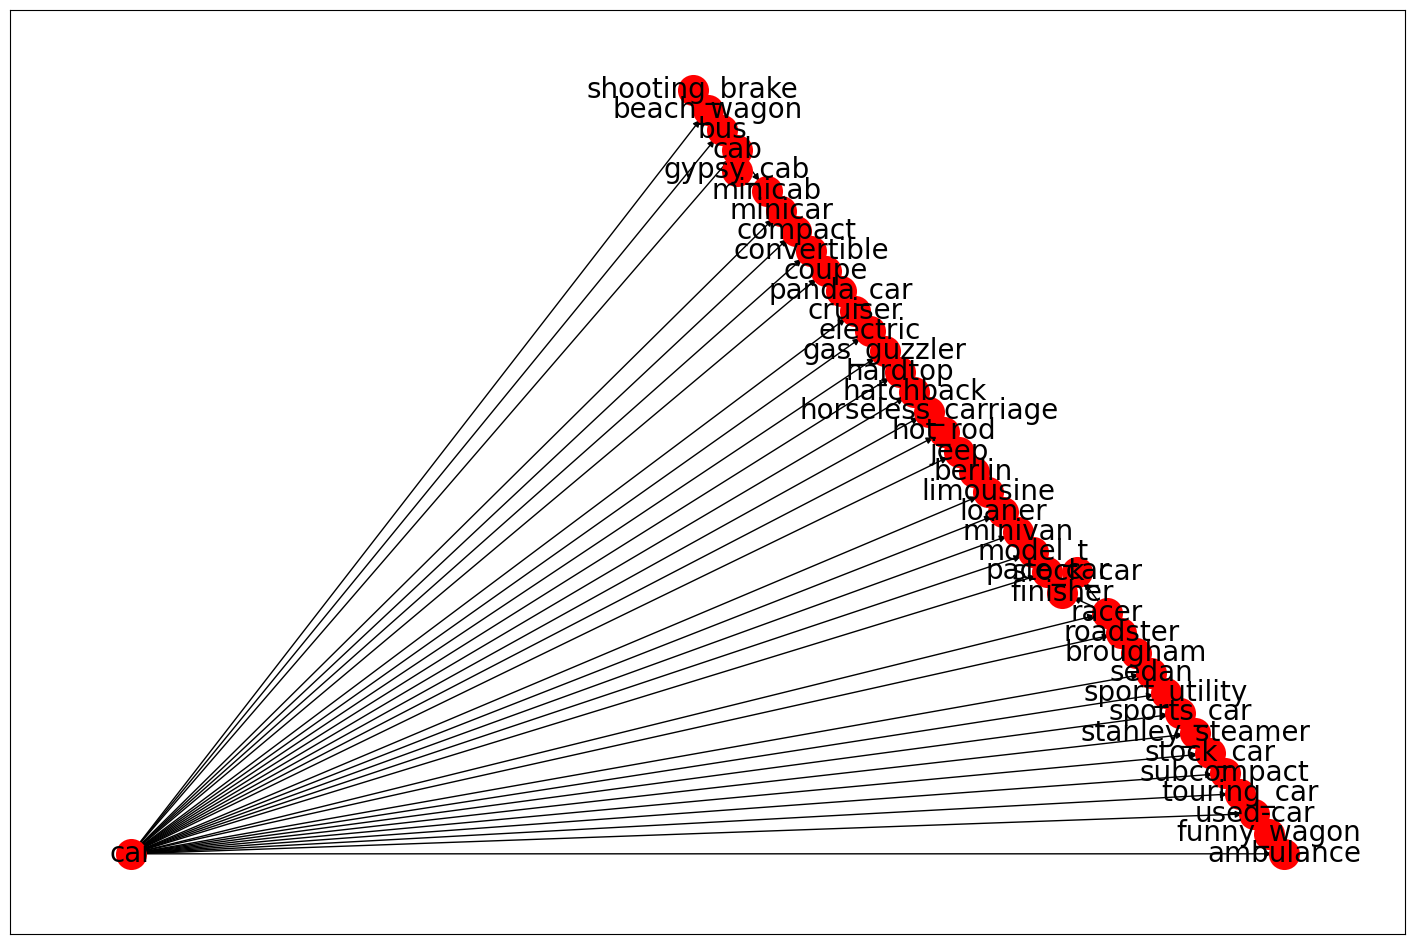

In [ ]:
print(ss[0].name())
G, labels = closure_graph(ss[0], fn = lambda s: s.hyponyms())
draw_text_graph(G, labels)

### **Hypernyms**: conceptos que son mas generales !

car.n.01


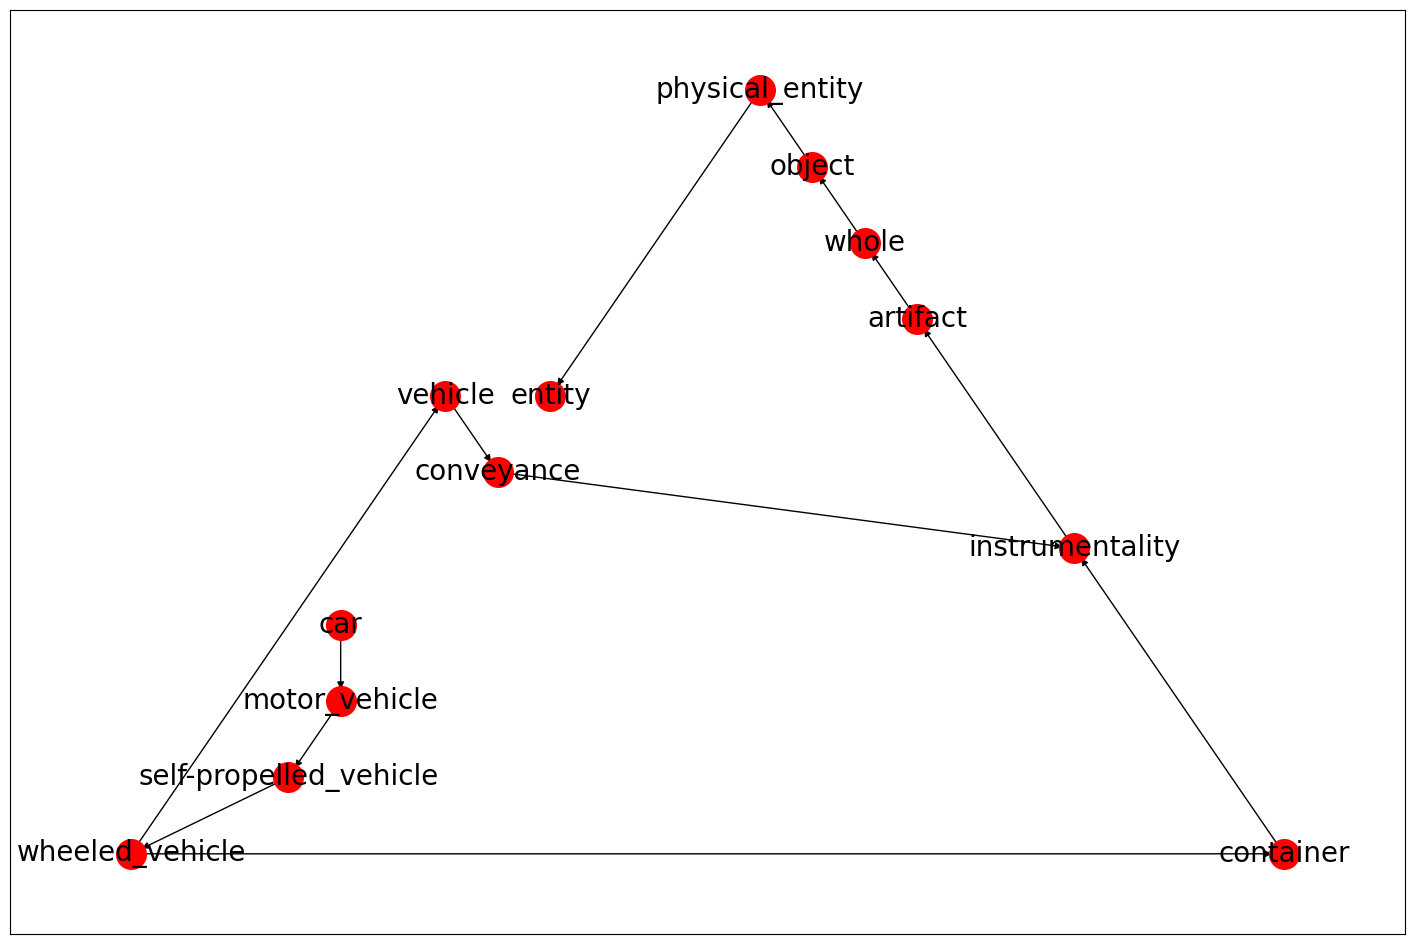

In [ ]:
print(ss[0].name())
G, labels = closure_graph(ss[0], fn = lambda s: s.hypernyms())
draw_text_graph(G, labels)

### Similitud Semántica


In [ ]:
def show_syns(word):
  ss = wn.synsets(word, lang='spa')
  for syn in ss:
    print(syn.name(), ': ', syn.definition())
    for name in syn.lemma_names():
      print(' * ', name)
  return ss

In [ ]:
ss = show_syns('perro')

dog.n.01 :  a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds
 *  dog
 *  domestic_dog
 *  Canis_familiaris
rotter.n.01 :  a person who is deemed to be despicable or contemptible
 *  rotter
 *  dirty_dog
 *  rat
 *  skunk
 *  stinker
 *  stinkpot
 *  bum
 *  puke
 *  crumb
 *  lowlife
 *  scum_bag
 *  so-and-so
 *  git


In [ ]:
ss2 = show_syns('gato')

cat.n.01 :  feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats
 *  cat
 *  true_cat
tom.n.02 :  male cat
 *  tom
 *  tomcat
dodger.n.01 :  a shifty deceptive person
 *  dodger
 *  fox
 *  slyboots


In [ ]:
ss3 = show_syns('animal')

animal.n.01 :  a living organism characterized by voluntary movement
 *  animal
 *  animate_being
 *  beast
 *  brute
 *  creature
 *  fauna
beast.n.02 :  a cruelly rapacious person
 *  beast
 *  wolf
 *  savage
 *  brute
 *  wildcat
dunce.n.01 :  a stupid person; these words are used to express a low opinion of someone's intelligence
 *  dunce
 *  dunderhead
 *  numskull
 *  blockhead
 *  bonehead
 *  lunkhead
 *  hammerhead
 *  knucklehead
 *  loggerhead
 *  muttonhead
 *  shithead
 *  dumbass
 *  fuckhead


In [ ]:
perro = ss[0]
gato = ss2[0]
animal = ss3[0]

In [ ]:
# similitud entre 'animal' y 'perro'
animal.path_similarity(perro)

0.3333333333333333

In [ ]:
# similitud entre 'animal' y 'gato'
animal.path_similarity(gato)

0.125

In [ ]:
perro.path_similarity(gato)

0.2

In [ ]:
perro.path_similarity(perro)

1.0

# **Embedddings:** Convertir los textos en numeros
* Una incrustación de palabras es un enfoque para proporcionar una representación vectorial densa de palabras que capturan algo acerca de su significado


## Word Embeddings:
Cada palabra es una representacion numerica

###Word2Vec Embedding

Este modelo permite entrenarlo con vocavulario o cargar el entrenado por Google

In [9]:
from gensim.models import Word2Vec
# define los datos de entrenamiento
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
  ['this', 'is', 'the', 'second', 'sentence'],
  ['yet', 'another', 'sentence'],
  ['one', 'more', 'sentence'],
  ['and', 'the', 'final', 'sentence']]
# entrenamiento modelo
model = Word2Vec(sentences, min_count=1)
# summarize el modelo cargado
print(model)
# summarize vocabulario
words = list(model.wv.index_to_key)
print(words)
# aceso al vector para una palabra
print(model.wv['sentence'])
# guardamos modelo
model.save('model.bin')
# cargamos el modelo
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec<vocab=14, vector_size=100, alpha=0.025>
['sentence', 'the', 'is', 'this', 'final', 'and', 'more', 'one', 'another', 'yet', 'second', 'word2vec', 'for', 'first']
[-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
 -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
 -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
 -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
  8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
 -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
  4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
 -4.1370760e-03  8.2453608e-04  8.498

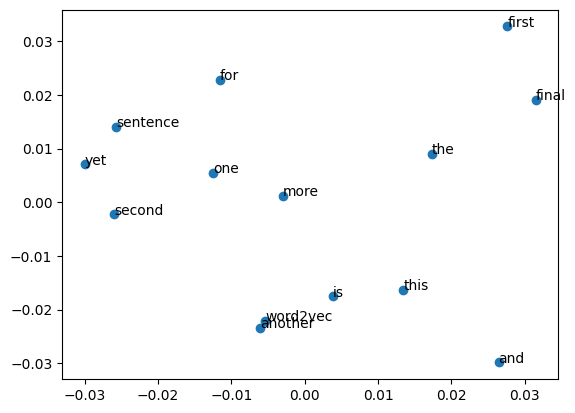

In [10]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# definir los datos de formación
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
 ['this', 'is', 'the', 'second', 'sentence'],
 ['yet', 'another', 'sentence'],
 ['one', 'more', 'sentence'],
 ['and', 'the', 'final', 'sentence']]
# modelo de entrenamiento
model = Word2Vec(sentences, min_count=1)
# ajustar un modelo de PCA 2d a los vectores
X = model.wv[model.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
  pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

Cargando Word2Vec de Google

In [11]:
from gensim.models import KeyedVectors
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary = True)

In [13]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=10)
print(result)

[('queen', 0.7118193507194519), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321839332581), ('kings', 0.5236844420433044), ('Queen_Consort', 0.5235945582389832), ('queens', 0.5181134343147278), ('sultan', 0.5098593831062317), ('monarchy', 0.5087411999702454)]


In [15]:
result = model.most_similar(negative=['woman'], topn=10)
print(result)

[('Globalization_KEY_FACTORS', 0.3031598925590515), ('José_Luis_Villegas_jvillegas@sacbee.com', 0.2894797921180725), ('Cadec_Mobius_TTS', 0.28655409812927246), ('K.Kahne_###-###', 0.2857955992221832), ('M.Kenseth_###-###', 0.2811467945575714), ('Above_Replacement', 0.277712345123291), ('conf_C####_TORONTO', 0.27437204122543335), ('eScholar_Uniq_ID', 0.2702941298484802), ('E.Sadler_###-###', 0.2653200030326843), ('By_DOUG_HAIDET', 0.26515263319015503)]


In [16]:
from sklearn.manifold import TSNE
def display_closestwords_tsnescatterplot(model, word):

    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    print(close_words)

    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)

    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=10.0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

[('clouds', 0.7632127404212952), ('Cloud', 0.6046801805496216), ('Abu_Risha_assassination', 0.595571756362915), ('Carefully_cautiously', 0.5875018239021301), ('cloud_computing', 0.5641706585884094), ('daily_Ichimoku', 0.551316499710083), ('IaaS_PaaS_SaaS', 0.5428812503814697), ('dark_clouds', 0.5420233011245728), ('Flexiscale', 0.5374433994293213), ('InfoWorld_Cloud_Computing', 0.5269529819488525)]


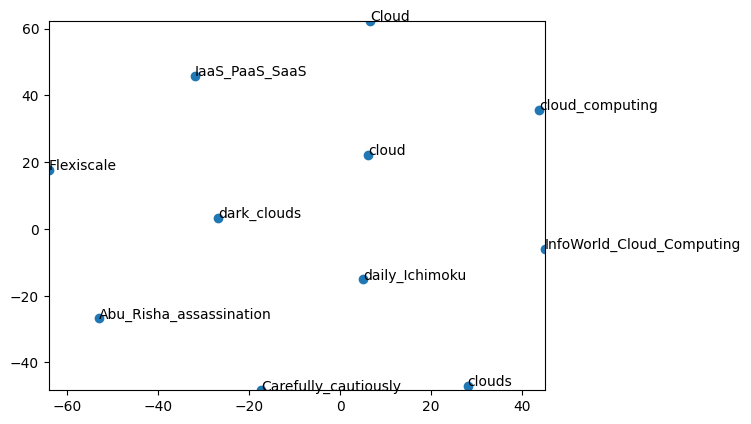

In [22]:
import numpy as np
import matplotlib.pyplot as plt
display_closestwords_tsnescatterplot(model, 'cloud')

In [23]:
model.similarity('woman', 'man')

0.76640123

### Glove
Tiene varios modelos vamos a cargar uno similar al anterior pero si desea otro los puede ver en [Glove](https://github.com/stanfordnlp/GloVe)

In [24]:
from gensim.models import KeyedVectors
# cargar el modelo Stanford GloVe
filename = 'glove.6B.100d.txt'
model = KeyedVectors.load_word2vec_format(filename, binary=False)
# calcular: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7698540687561035)]


In [26]:
result = model.most_similar(positive=['woman'], topn=10)
print(result)

[('girl', 0.8472671508789062), ('man', 0.832349419593811), ('mother', 0.827568769454956), ('boy', 0.7720510363578796), ('she', 0.7632068395614624), ('child', 0.7601762413978577), ('wife', 0.7505022883415222), ('her', 0.7445706129074097), ('herself', 0.7426273822784424), ('daughter', 0.726445734500885)]


In [28]:
def display_closestwords_tsnescatterplot(model, word):

    arr = np.empty((0,100), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    print(close_words)

    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)

    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=10.0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

[('clouds', 0.7674151659011841), ('ash', 0.712124228477478), ('dust', 0.6641156077384949), ('sky', 0.6198914647102356), ('mist', 0.61464524269104), ('fog', 0.6023924350738525), ('shadow', 0.5859904885292053), ('smoke', 0.5859541893005371), ('swirling', 0.5852329134941101), ('shadows', 0.58254075050354)]


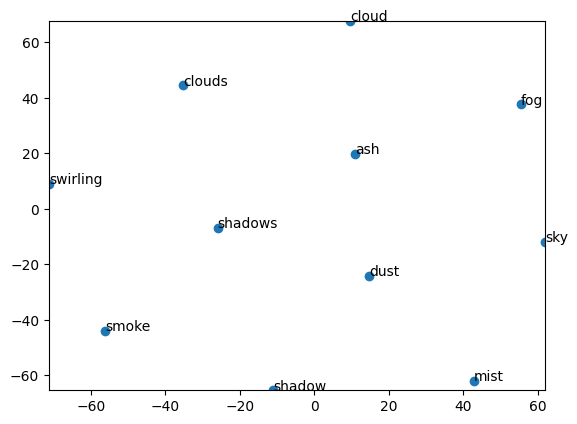

In [29]:
import numpy as np
import matplotlib.pyplot as plt
display_closestwords_tsnescatterplot(model, 'cloud')

### Fasttext
Tiene varios modelos vamos a cargar uno en español [Fasttext](https://fasttext.cc/docs/en/crawl-vectors.html)

In [1]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199676 sha256=1e31ef77e4227ede77b1136ac1b0018e316f213426a7fd2c9f2a54323e41b640
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [2]:
import fasttext
import fasttext.util
ft = fasttext.load_model('/content/drive/MyDrive/NLP/cc.es.300.bin')
ft.get_dimension()

300

In [3]:
ft.get_word_vector('hola')

array([-5.66945970e-02,  5.34497127e-02, -6.12863861e-02, -2.43984938e-01,
       -1.36605650e-01,  5.66679165e-02,  5.90700731e-02, -1.81467310e-02,
       -9.96223241e-02, -1.20628618e-01, -5.05264848e-02,  7.94697106e-02,
        1.05264515e-01,  6.81780279e-02,  1.32493883e-01,  3.31371576e-02,
       -4.62438762e-02,  9.18786153e-02, -1.74927972e-02,  7.59232268e-02,
        5.22639155e-02, -5.35255820e-02,  1.28745120e-02,  1.14882946e-01,
       -4.02459130e-02,  3.16499285e-02, -1.51373744e-01,  4.18794267e-02,
       -6.79477751e-02,  2.31544822e-02,  3.07090711e-02,  8.19071308e-02,
       -1.44711006e-02, -1.12207010e-01, -5.67496680e-02,  3.39836441e-02,
       -1.00392941e-03, -9.06518623e-02, -1.68143287e-02,  1.00917302e-01,
        1.24769092e-01, -1.48573294e-01, -6.61816075e-02, -5.23402989e-02,
       -2.74200857e-01,  1.37896806e-01,  4.01747134e-03,  9.41338092e-02,
       -3.58653516e-02,  1.09506473e-01,  6.02002554e-02,  2.64170289e-01,
        6.17561862e-02,  

In [6]:
ft.get_nearest_neighbors('bebe')

[(0.6985252499580383, 'bebe.'),
 (0.6931070685386658, 'beba'),
 (0.6921733021736145, 'bebé'),
 (0.6872073411941528, 'bebes'),
 (0.6658267378807068, 'bebito'),
 (0.6476720571517944, 'bebecito'),
 (0.6437262892723083, 'bebita'),
 (0.635201632976532, 'bebesito'),
 (0.6105073094367981, 'Bebe'),
 (0.5911957025527954, 'bebesita')]

## Sentence Embedding:

Cada frase con su propio vector

In [7]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np


sentences = ["I ate dinner.", "We had a three-course meal.", "Brad came to dinner with us.", "He loves fish tacos.",
             "In the end, we all felt like we ate too much.","We all agreed; it was a magnificent evening.","I love driving my car"]

# Tokenization of each document
tokenized_sent = []
for s in sentences:
    tokenized_sent.append(word_tokenize(s.lower()))
print(tokenized_sent)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[['i', 'ate', 'dinner', '.'], ['we', 'had', 'a', 'three-course', 'meal', '.'], ['brad', 'came', 'to', 'dinner', 'with', 'us', '.'], ['he', 'loves', 'fish', 'tacos', '.'], ['in', 'the', 'end', ',', 'we', 'all', 'felt', 'like', 'we', 'ate', 'too', 'much', '.'], ['we', 'all', 'agreed', ';', 'it', 'was', 'a', 'magnificent', 'evening', '.'], ['i', 'love', 'driving', 'my', 'car']]


In [8]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

###Doc2Vec:
Version the Sentence Embedding the Word2Vec

In [9]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_sent)]
tagged_data

[TaggedDocument(words=['i', 'ate', 'dinner', '.'], tags=[0]),
 TaggedDocument(words=['we', 'had', 'a', 'three-course', 'meal', '.'], tags=[1]),
 TaggedDocument(words=['brad', 'came', 'to', 'dinner', 'with', 'us', '.'], tags=[2]),
 TaggedDocument(words=['he', 'loves', 'fish', 'tacos', '.'], tags=[3]),
 TaggedDocument(words=['in', 'the', 'end', ',', 'we', 'all', 'felt', 'like', 'we', 'ate', 'too', 'much', '.'], tags=[4]),
 TaggedDocument(words=['we', 'all', 'agreed', ';', 'it', 'was', 'a', 'magnificent', 'evening', '.'], tags=[5]),
 TaggedDocument(words=['i', 'love', 'driving', 'my', 'car'], tags=[6])]

In [10]:
model = Doc2Vec(tagged_data, vector_size = 20, window = 2, min_count = 1, epochs = 100)

'''
vector_size = Dimensionality of the feature vectors.
window = The maximum distance between the current and predicted word within a sentence.
min_count = Ignores all words with total frequency lower than this.
alpha = The initial learning rate.
'''

## Print model vocabulary
model.wv.index_to_key

['.',
 'we',
 'i',
 'ate',
 'dinner',
 'a',
 'all',
 'to',
 'loves',
 'he',
 'us',
 'with',
 'meal',
 'came',
 'brad',
 'tacos',
 'three-course',
 'had',
 'fish',
 'car',
 'my',
 ';',
 'driving',
 'love',
 'evening',
 'magnificent',
 'was',
 'it',
 'agreed',
 'the',
 'much',
 'too',
 'like',
 'felt',
 ',',
 'end',
 'in']

In [11]:
test_doc = word_tokenize("I loves my car".lower())
test_doc_vector = model.infer_vector(test_doc)
model.docvecs.most_similar(positive = [test_doc_vector])

<ipython-input-11-e7e35ead1418>:3: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  model.docvecs.most_similar(positive = [test_doc_vector])


[(3, 0.7933106422424316),
 (4, 0.7274739146232605),
 (2, 0.7028791308403015),
 (1, 0.6619135141372681),
 (5, 0.38620010018348694),
 (6, 0.2812839448451996),
 (0, 0.07656492292881012)]

###SentenceBERT

In [12]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.9 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125925 sha256=62de8dd6dad40f827f5499fb060d51d515ede76c1c57fd74e44ac7558c85858a
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [13]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [14]:
sentence_embeddings = sbert_model.encode(sentences)
print('Sample BERT embedding vector - length', len(sentence_embeddings[0]))
print('Sample BERT embedding vector - note includes negative values', sentence_embeddings[0])

Sample BERT embedding vector - length 768
Sample BERT embedding vector - note includes negative values [ 1.71653405e-01  2.26480383e-02  1.93014526e+00 -2.18605921e-01
  3.40925343e-02  5.23479402e-01 -1.25486851e+00  9.17776525e-01
 -3.36900800e-01 -5.32599986e-01  3.54305148e-01  8.74753654e-01
  7.92069495e-01  1.30202457e-01  3.55904922e-03  5.88224418e-02
  5.33439517e-01 -2.87108541e-01  1.44994378e-01 -8.17292750e-01
 -2.01647189e-02  1.39118999e-01 -9.96068895e-01  1.77107349e-01
  4.00360078e-02  4.30928230e-01 -2.58669794e-01  4.17331129e-01
  1.20064056e+00  9.88088548e-02 -2.55319715e-01 -1.98272448e-02
  8.69255304e-01 -8.33961964e-01  1.74719587e-01 -7.85964727e-01
 -1.65306166e-01  2.84225434e-01 -4.37051505e-01  6.77007496e-01
 -3.97849828e-01  1.01804517e-01  7.46632874e-01  4.15896773e-01
 -2.42901091e-02  2.68644691e-01  1.04453194e+00  1.43222368e+00
  4.57947612e-01 -1.08110774e+00  9.75883007e-01 -1.14395487e+00
 -2.62539119e-01  6.03446245e-01 -5.55950463e-01  1.

In [15]:
query = "I loves my car"
query_vec = sbert_model.encode([query])[0]

In [16]:
for sent in sentences:
  sim = cosine(query_vec, sbert_model.encode([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

Sentence =  I ate dinner. ; similarity =  0.21467808
Sentence =  We had a three-course meal. ; similarity =  0.101693794
Sentence =  Brad came to dinner with us. ; similarity =  0.22401702
Sentence =  He loves fish tacos. ; similarity =  0.4021784
Sentence =  In the end, we all felt like we ate too much. ; similarity =  0.2146981
Sentence =  We all agreed; it was a magnificent evening. ; similarity =  0.6218511
Sentence =  I love driving my car ; similarity =  0.92001325


###InferSent

In [17]:
! mkdir encoder
! curl -Lo encoder/infersent2.pkl https://dl.fbaipublicfiles.com/infersent/infersent2.pkl

! mkdir GloVe
! curl -Lo GloVe/glove.840B.300d.zip http://nlp.stanford.edu/data/glove.840B.300d.zip
! unzip GloVe/glove.840B.300d.zip -d GloVe/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  146M  100  146M    0     0  41.4M      0  0:00:03  0:00:03 --:--:-- 41.4M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0   315    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0   353    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2075M  100 2075M    0     0  2161k      0  0:16:23  0:16:23 --:--:-- 2088k
Archive:  GloVe/glove.840B.300d.zip
  inflating: GloVe/glove.840B.300d.txt  


In [18]:
import numpy as np
import time

import torch
import torch.nn as nn


class InferSent(nn.Module):

    def __init__(self, config):
        super(InferSent, self).__init__()
        self.bsize = config['bsize']
        self.word_emb_dim = config['word_emb_dim']
        self.enc_lstm_dim = config['enc_lstm_dim']
        self.pool_type = config['pool_type']
        self.dpout_model = config['dpout_model']
        self.version = 1 if 'version' not in config else config['version']

        self.enc_lstm = nn.LSTM(self.word_emb_dim, self.enc_lstm_dim, 1,
                                bidirectional=True, dropout=self.dpout_model)

        assert self.version in [1, 2]
        if self.version == 1:
            self.bos = '<s>'
            self.eos = '</s>'
            self.max_pad = True
            self.moses_tok = False
        elif self.version == 2:
            self.bos = '<p>'
            self.eos = '</p>'
            self.max_pad = False
            self.moses_tok = True

    def is_cuda(self):
        # either all weights are on cpu or they are on gpu
        return self.enc_lstm.bias_hh_l0.data.is_cuda

    def forward(self, sent_tuple):
        # sent_len: [max_len, ..., min_len] (bsize)
        # sent: (seqlen x bsize x worddim)
        sent, sent_len = sent_tuple

        # Sort by length (keep idx)
        sent_len_sorted, idx_sort = np.sort(sent_len)[::-1], np.argsort(-sent_len)
        sent_len_sorted = sent_len_sorted.copy()
        idx_unsort = np.argsort(idx_sort)

        idx_sort = torch.from_numpy(idx_sort).cuda() if self.is_cuda() \
            else torch.from_numpy(idx_sort)
        sent = sent.index_select(1, idx_sort)

        # Handling padding in Recurrent Networks
        sent_packed = nn.utils.rnn.pack_padded_sequence(sent, sent_len_sorted)
        sent_output = self.enc_lstm(sent_packed)[0]  # seqlen x batch x 2*nhid
        sent_output = nn.utils.rnn.pad_packed_sequence(sent_output)[0]

        # Un-sort by length
        idx_unsort = torch.from_numpy(idx_unsort).cuda() if self.is_cuda() \
            else torch.from_numpy(idx_unsort)
        sent_output = sent_output.index_select(1, idx_unsort)

        # Pooling
        if self.pool_type == "mean":
            sent_len = torch.FloatTensor(sent_len.copy()).unsqueeze(1).cuda()
            emb = torch.sum(sent_output, 0).squeeze(0)
            emb = emb / sent_len.expand_as(emb)
        elif self.pool_type == "max":
            if not self.max_pad:
                sent_output[sent_output == 0] = -1e9
            emb = torch.max(sent_output, 0)[0]
            if emb.ndimension() == 3:
                emb = emb.squeeze(0)
                assert emb.ndimension() == 2

        return emb

    def set_w2v_path(self, w2v_path):
        self.w2v_path = w2v_path

    def get_word_dict(self, sentences, tokenize=True):
        # create vocab of words
        word_dict = {}
        sentences = [s.split() if not tokenize else self.tokenize(s) for s in sentences]
        for sent in sentences:
            for word in sent:
                if word not in word_dict:
                    word_dict[word] = ''
        word_dict[self.bos] = ''
        word_dict[self.eos] = ''
        return word_dict

    def get_w2v(self, word_dict):
        assert hasattr(self, 'w2v_path'), 'w2v path not set'
        # create word_vec with w2v vectors
        word_vec = {}
        with open(self.w2v_path, encoding='utf-8') as f:
            for line in f:
                word, vec = line.split(' ', 1)
                if word in word_dict:
                    word_vec[word] = np.fromstring(vec, sep=' ')
        print('Found %s(/%s) words with w2v vectors' % (len(word_vec), len(word_dict)))
        return word_vec

    def get_w2v_k(self, K):
        assert hasattr(self, 'w2v_path'), 'w2v path not set'
        # create word_vec with k first w2v vectors
        k = 0
        word_vec = {}
        with open(self.w2v_path, encoding='utf-8') as f:
            for line in f:
                word, vec = line.split(' ', 1)
                if k <= K:
                    word_vec[word] = np.fromstring(vec, sep=' ')
                    k += 1
                if k > K:
                    if word in [self.bos, self.eos]:
                        word_vec[word] = np.fromstring(vec, sep=' ')

                if k > K and all([w in word_vec for w in [self.bos, self.eos]]):
                    break
        return word_vec

    def build_vocab(self, sentences, tokenize=True):
        assert hasattr(self, 'w2v_path'), 'w2v path not set'
        word_dict = self.get_word_dict(sentences, tokenize)
        self.word_vec = self.get_w2v(word_dict)
        print('Vocab size : %s' % (len(self.word_vec)))

    # build w2v vocab with k most frequent words
    def build_vocab_k_words(self, K):
        assert hasattr(self, 'w2v_path'), 'w2v path not set'
        self.word_vec = self.get_w2v_k(K)
        print('Vocab size : %s' % (K))

    def update_vocab(self, sentences, tokenize=True):
        assert hasattr(self, 'w2v_path'), 'warning : w2v path not set'
        assert hasattr(self, 'word_vec'), 'build_vocab before updating it'
        word_dict = self.get_word_dict(sentences, tokenize)

        # keep only new words
        for word in self.word_vec:
            if word in word_dict:
                del word_dict[word]

        # udpate vocabulary
        if word_dict:
            new_word_vec = self.get_w2v(word_dict)
            self.word_vec.update(new_word_vec)
        else:
            new_word_vec = []
        print('New vocab size : %s (added %s words)'% (len(self.word_vec), len(new_word_vec)))

    def get_batch(self, batch):
        # sent in batch in decreasing order of lengths
        # batch: (bsize, max_len, word_dim)
        embed = np.zeros((len(batch[0]), len(batch), self.word_emb_dim))

        for i in range(len(batch)):
            for j in range(len(batch[i])):
                embed[j, i, :] = self.word_vec[batch[i][j]]

        return torch.FloatTensor(embed)

    def tokenize(self, s):
        from nltk.tokenize import word_tokenize
        if self.moses_tok:
            s = ' '.join(word_tokenize(s))
            s = s.replace(" n't ", "n 't ")  # HACK to get ~MOSES tokenization
            return s.split()
        else:
            return word_tokenize(s)

    def prepare_samples(self, sentences, bsize, tokenize, verbose):
        sentences = [[self.bos] + s.split() + [self.eos] if not tokenize else
                     [self.bos] + self.tokenize(s) + [self.eos] for s in sentences]
        n_w = np.sum([len(x) for x in sentences])

        # filters words without w2v vectors
        for i in range(len(sentences)):
            s_f = [word for word in sentences[i] if word in self.word_vec]
            if not s_f:
                import warnings
                warnings.warn('No words in "%s" (idx=%s) have w2v vectors. \
                               Replacing by "</s>"..' % (sentences[i], i))
                s_f = [self.eos]
            sentences[i] = s_f

        lengths = np.array([len(s) for s in sentences])
        n_wk = np.sum(lengths)
        if verbose:
            print('Nb words kept : %s/%s (%.1f%s)' % (
                        n_wk, n_w, 100.0 * n_wk / n_w, '%'))

        # sort by decreasing length
        lengths, idx_sort = np.sort(lengths)[::-1], np.argsort(-lengths)
        sentences = np.array(sentences)[idx_sort]

        return sentences, lengths, idx_sort

    def encode(self, sentences, bsize=64, tokenize=True, verbose=False):
        tic = time.time()
        sentences, lengths, idx_sort = self.prepare_samples(
                        sentences, bsize, tokenize, verbose)

        embeddings = []
        for stidx in range(0, len(sentences), bsize):
            batch = self.get_batch(sentences[stidx:stidx + bsize])
            if self.is_cuda():
                batch = batch.cuda()
            with torch.no_grad():
                batch = self.forward((batch, lengths[stidx:stidx + bsize])).data.cpu().numpy()
            embeddings.append(batch)
        embeddings = np.vstack(embeddings)

        # unsort
        idx_unsort = np.argsort(idx_sort)
        embeddings = embeddings[idx_unsort]

        if verbose:
            print('Speed : %.1f sentences/s (%s mode, bsize=%s)' % (
                    len(embeddings)/(time.time()-tic),
                    'gpu' if self.is_cuda() else 'cpu', bsize))
        return embeddings

    def visualize(self, sent, tokenize=True):

        sent = sent.split() if not tokenize else self.tokenize(sent)
        sent = [[self.bos] + [word for word in sent if word in self.word_vec] + [self.eos]]

        if ' '.join(sent[0]) == '%s %s' % (self.bos, self.eos):
            import warnings
            warnings.warn('No words in "%s" have w2v vectors. Replacing \
                           by "%s %s"..' % (sent, self.bos, self.eos))
        batch = self.get_batch(sent)

        if self.is_cuda():
            batch = batch.cuda()
        output = self.enc_lstm(batch)[0]
        output, idxs = torch.max(output, 0)
        # output, idxs = output.squeeze(), idxs.squeeze()
        idxs = idxs.data.cpu().numpy()
        argmaxs = [np.sum((idxs == k)) for k in range(len(sent[0]))]

        # visualize model
        import matplotlib.pyplot as plt
        x = range(len(sent[0]))
        y = [100.0 * n / np.sum(argmaxs) for n in argmaxs]
        plt.xticks(x, sent[0], rotation=45)
        plt.bar(x, y)
        plt.ylabel('%')
        plt.title('Visualisation of words importance')
        plt.show()

        return output, idxs

In [19]:
import torch

V = 2
MODEL_PATH = 'encoder/infersent%s.pkl' % V
params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': V}
model = InferSent(params_model)
model.load_state_dict(torch.load(MODEL_PATH))

W2V_PATH = '/content/GloVe/glove.840B.300d.txt'
model.set_w2v_path(W2V_PATH)

In [20]:
model.build_vocab(sentences, tokenize=True)

Found 40(/40) words with w2v vectors
Vocab size : 40


In [23]:
query = "I loves my car"
query_vec = model.encode(query)[0]
query_vec

<ipython-input-18-1a067950f0fd>:196: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sentences = np.array(sentences)[idx_sort]


array([ 0.02459561,  0.04943122, -0.15705208, ...,  0.07534433,
       -0.03941801,  0.05388858], dtype=float32)

In [24]:
similarity = []
for sent in sentences:
  sim = cosine(query_vec, model.encode([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

Sentence =  I ate dinner. ; similarity =  0.6868881
Sentence =  We had a three-course meal. ; similarity =  0.504327
Sentence =  Brad came to dinner with us. ; similarity =  0.55740434
Sentence =  He loves fish tacos. ; similarity =  0.590714
Sentence =  In the end, we all felt like we ate too much. ; similarity =  0.57681197
Sentence =  We all agreed; it was a magnificent evening. ; similarity =  0.5049964
Sentence =  I love driving my car ; similarity =  0.6993251


###Universal Sentence Encoder

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

In [ ]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
sentence_embeddings = model(sentences)
query = "I loves my car"
query_vec = model([query])[0]

In [ ]:
for sent in sentences:
  sim = cosine(query_vec, model([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

Sentence =  I ate dinner. ; similarity =  0.259361
Sentence =  We had a three-course meal. ; similarity =  0.25259715
Sentence =  Brad came to dinner with us. ; similarity =  0.15848303
Sentence =  He loves fish tacos. ; similarity =  0.3287294
Sentence =  In the end, we all felt like we ate too much. ; similarity =  0.12806845
Sentence =  We all agreed; it was a magnificent evening. ; similarity =  0.09240747
Sentence =  I love driving my car ; similarity =  0.8054881


## Ejemplo utili tokenizador:
Hay algunos algoritmos que traen su propio sistema embebido y este por lo general se llama tokenizer, a continuacion un ejemplo con un tokenizer para deteccion de fake new en español, este por ejemplo asigna un numero a cada palabra y 0 y 2 como inicio y final de la frase
el algoritmo fue obtenido de [huggingface](https://huggingface.co/Narrativaai/fake-news-detection-spanish?text=La+palabra+%22haiga%22%2C+aceptada+por+la+RAE+%5BSEP%5D+La+palabra+%22haiga%22%2C+aceptada+por+la+RAE+La+Real+Academia+de+la+Lengua+%28RAE%29%2C+ha+aceptado+el+uso+de+%22HAIGA%22%2C+para+su+utilizaci%C3%B3n+en+las+tres+personas+del+singular+del+presente+del+subjuntivo+del+verbo+hacer%2C+aunque+asegura+que+la+forma+m%C3%A1s+recomendable+en+la+lengua+culta+para+este+tiempo%2C+sigue+siendo+%22haya%22.+As%C3%AD+lo+han+confirmado+fuentes+de+la+RAE%2C+que+explican+que+este+cambio+ha+sido+propuesto+y+aprobado+por+el+pleno+de+la+Academia+de+la+Lengua%2C+tras+la+extendida+utilizaci%C3%B3n+por+todo+el+territorio+nacional%2C+sobre+todo%2C+empleado+por+personas+carentes+de+estudios+o+con+estudios+b%C3%A1sicos+de+graduado+escolar.+Ya+no+ser%C3%A1+objeto+de+burla+ese+compa%C3%B1ero+que+a+diario+repite+aquello+de+%22Mientras+que+haiga+faena%2C+no+podemos+quejarnos%22+o+esa+abuela+que+repite+aquello+de+%22El+que+haiga+sacao+los+juguetes%2C+que+los+recoja%22.+Entre+otras+palabras+novedosas+que+ha+aceptado+la+RAE%2C+contamos+tambi%C3%A9n+con+%22Descambiar%22%2C+significa+deshacer+un+cambio%2C+por+ejemplo+%22devolver+la+compra%22.+Visto+lo+visto%2C+nadie+apostar%C3%ADa+que+la+palabra+%22follamigos%22+sea+la+siguiente+de+la+lista.)

In [ ]:
# Esto permite utilizar el tokenizador que esta en el modelo de las Fake News
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("Narrativaai/fake-news-detection-spanish")

In [ ]:
tokenizer("premonición")

{'input_ids': [0, 2234, 324, 807, 2], 'attention_mask': [1, 1, 1, 1, 1]}

In [ ]:
tokenizer("	premonicion")

{'input_ids': [0, 275, 252, 1619, 2934, 17531, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}